# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate city lists

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid": weather_api_key,
    "q": "city",
    "units": "metric"
}

response = requests.get(url, params)
print(response.url)
response.json()
    
data= response.json()

print(json.dumps(data, indent=4))

http://api.openweathermap.org/data/2.5/weather?appid=aef4d9939ab4c543dce6f4284afcae1a&q=city&units=metric
{
    "coord": {
        "lon": 149.13,
        "lat": -35.28
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 19.71,
        "feels_like": 15.43,
        "temp_min": 18,
        "temp_max": 21.11,
        "pressure": 1016,
        "humidity": 63
    },
    "visibility": 10000,
    "wind": {
        "speed": 7.2,
        "deg": 60
    },
    "clouds": {
        "all": 99
    },
    "dt": 1608354507,
    "sys": {
        "type": 1,
        "id": 9588,
        "country": "AU",
        "sunrise": 1608317071,
        "sunset": 1608369395
    },
    "timezone": 39600,
    "id": 2172517,
    "name": "City",
    "cod": 200
}


In [4]:
#Create a dictionary to store the data
data = {
    "City":[],
    "Cloudiness":[],
    "Country":[],
    "Date":[],
    "Humidity":[],
    "Lat":[],
    "Lng":[],
    "Max Temp":[],
    "Wind Speed":[]
}
count = 1

In [5]:
print("Beginning Data Retrieval")
print('-----------------------------')
for city in cities:
    print(f"Processing Record {count} | {city}")
    params["q"] = city
    response = requests.get(url,params).json()
    
    if response["cod"] == "404":
        print("City not found. Try another city...")
    else:
        data["City"].append(city)
        data["Cloudiness"].append(response["clouds"]["all"])
        data["Country"].append(response["sys"]["country"])
        data["Date"].append(response["dt"])
        data["Humidity"].append(response["main"]["humidity"])
        data["Lat"].append(response["coord"]["lat"])
        data["Lng"].append(response["coord"]["lon"])
        data["Max Temp"].append(response["main"]["temp_max"])
        data["Wind Speed"].append(response["wind"]["speed"])
    count += 1
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

la asuncion
Processing Record 70 | provideniya
Processing Record 71 | ancud
Processing Record 72 | kushiro
Processing Record 73 | ahumada
City not found. Try another city...
Processing Record 74 | khatanga
Processing Record 75 | lagoa
Processing Record 76 | yellowknife
Processing Record 77 | coahuayana
Processing Record 78 | port hedland
Processing Record 79 | belushya guba
City not found. Try another city...
Processing Record 80 | mirpur sakro
Processing Record 81 | boyolangu
Processing Record 82 | severo-kurilsk
Processing Record 83 | port-cartier
Processing Record 84 | mar del plata
Processing Record 85 | new norfolk
Processing Record 86 | saskylakh
Processing Record 87 | cabo san lucas
Processing Record 88 | faanui
Processing Record 89 | mahebourg
Processing Record 90 | grosseto
Processing Record 91 | suntar
Processing Record 92 | torbay
Processing Record 93 | marcona
City not found. Try another city...
Processing Record 94 | rikitea
Processing Record 95 | nishihara
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
data_df = pd.DataFrame(data)
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,normal,20,US,1608353360,86,40.51,-88.99,1.67,8.20
1,ribeira grande,95,PT,1608353360,78,38.52,-28.70,16.14,4.57
2,punta arenas,97,CL,1608353360,76,-53.15,-70.92,9.00,3.60
3,grand gaube,4,MU,1608353185,72,-20.01,57.66,27.22,3.13
4,vardo,70,NO,1608353361,94,70.37,31.11,-5.26,2.36


In [7]:
# Output File (CSV)
data_df.to_csv("./output_data/weather_output.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

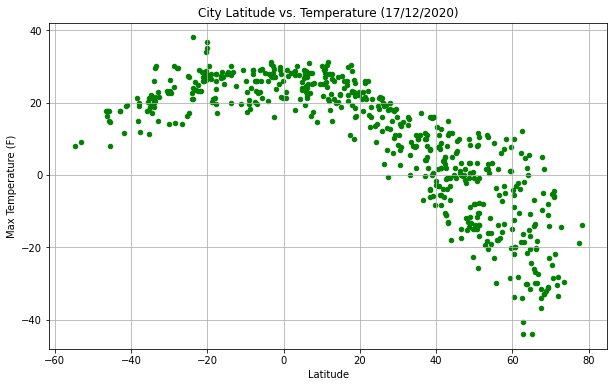

In [8]:
data_df.plot(kind='scatter', figsize=(10, 6), x='Lat',y='Max Temp', color="green",title='City Latitude vs. Temperature (17/12/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b=True)
plt.savefig("./output_data/output_images/Lat_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

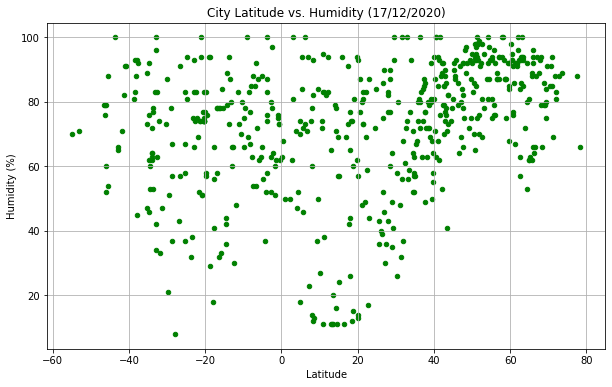

In [62]:

data_df.plot(kind='scatter',figsize=(10, 6), x='Lat',y='Humidity',color="green", title='City Latitude vs. Humidity (17/12/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True)
plt.savefig("./output_data/output_images/Lat_Humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

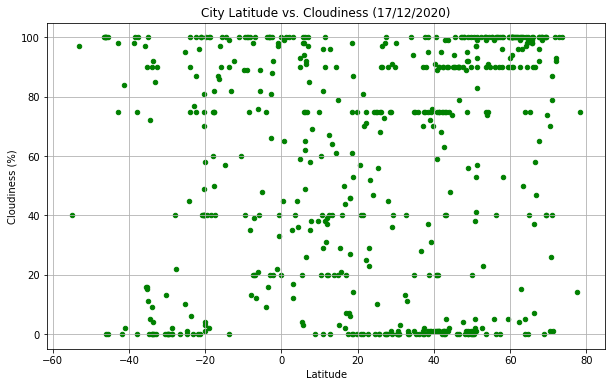

In [9]:
data_df.plot(kind='scatter', figsize=(10, 6), x='Lat',y='Cloudiness',color="green", title='City Latitude vs. Cloudiness (17/12/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True)
plt.savefig("./output_data/output_images/Lat_Cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

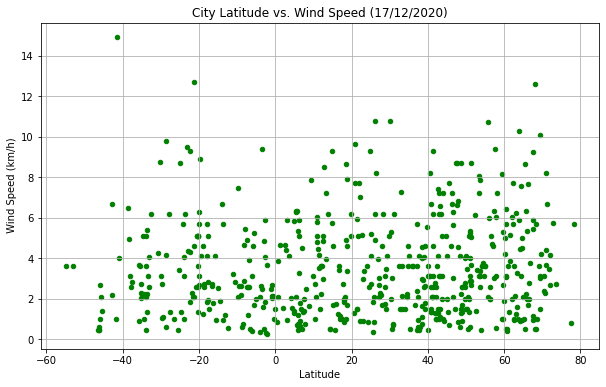

In [10]:
data_df.plot(kind='scatter', figsize=(10, 6), x='Lat',y='Wind Speed', color="green",title='City Latitude vs. Wind Speed (17/12/2020)')
plt.xlabel('Latitude')
plt.ylabel(' Wind Speed (km/h)')
plt.grid(b=True)
plt.savefig("./output_data/output_images/Lat_Wind.png")
plt.show()

## Linear Regression

In [11]:
result= st.linregress(data_df["Lat"], data_df["Max Temp"])
result

LinregressResult(slope=-0.4172952676526528, intercept=18.516957550112632, rvalue=-0.7767469934010988, pvalue=3.959415359674469e-114, stderr=0.014323799459406919)

In [12]:
#Create a function to create Linear Regression plots
def linreg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x.astype(float), y.astype(float))
    regress_values = x.astype(float) * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, edgecolors = "green")
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.min(),y.max()),fontsize=12,color="red")
    print(f'The r-value is: {rvalue}')

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = data_df.loc[data_df["Lat"] >= 0]
southern_df = data_df.loc[data_df["Lat"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8597489645202396


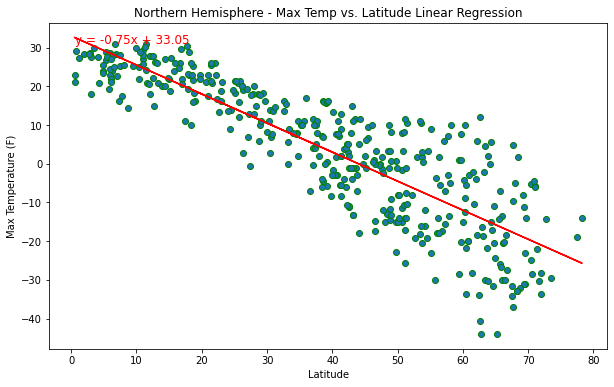

In [14]:
plt.figure(figsize=(10, 6))
linreg(northern_df["Lat"], northern_df["Max Temp"])
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("./output_data/output_images/NH_lat_vs_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5518370142338302


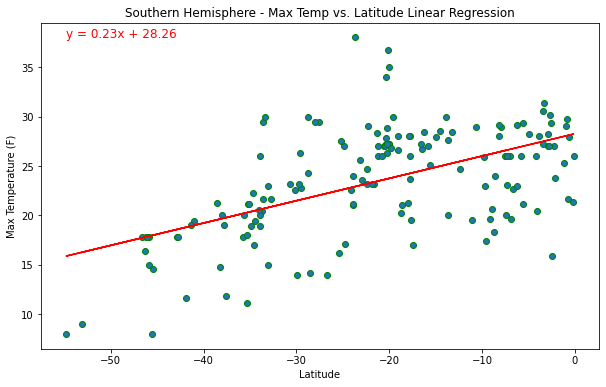

In [15]:
plt.figure(figsize=(10, 6))
linreg(southern_df["Lat"], southern_df["Max Temp"])
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("./output_data/output_images/SH_lat_vs_temp.png")

The high r value indicates a strong positive correlation between latitude and max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3731726133965489


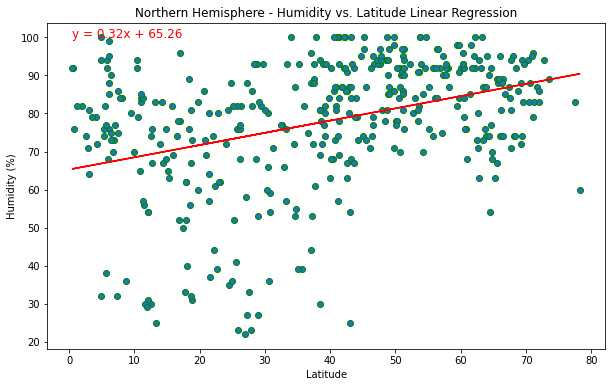

In [16]:
plt.figure(figsize=(10, 6))
linreg(northern_df["Lat"], northern_df["Humidity"])
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("./output_data/output_images/NH_lat_vs_humid.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16066635428134324


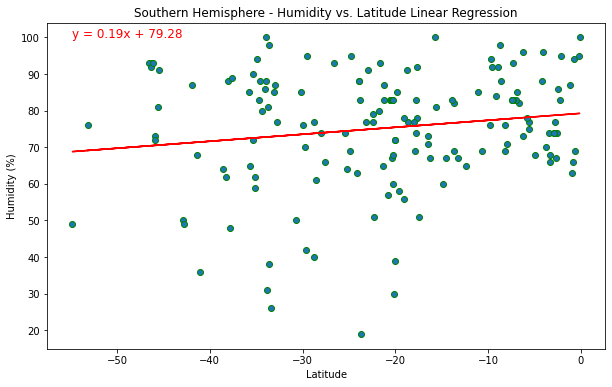

In [17]:
plt.figure(figsize=(10, 6))
linreg(southern_df["Lat"], southern_df["Humidity"])
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("./output_data/output_images/SH_lat_vs_humid.png")

The low r values indicate a weak to no relationship between humidity and latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22650543070085954


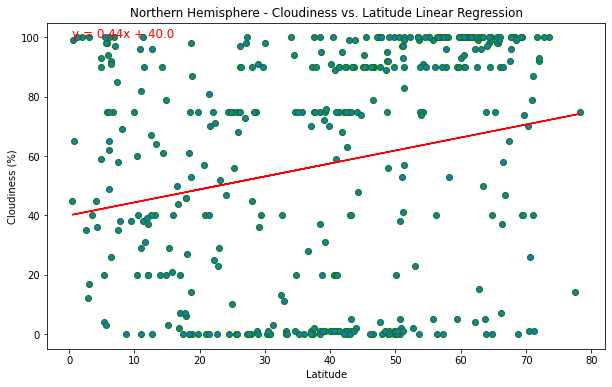

In [18]:
plt.figure(figsize=(10, 6))
linreg(northern_df["Lat"], northern_df["Cloudiness"])
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("./output_data/output_images/NH_lat_vs_cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14243263445785903


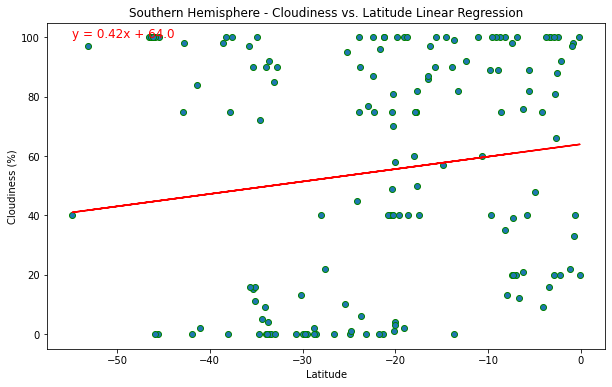

In [19]:
plt.figure(figsize=(10, 6))
linreg(southern_df["Lat"], southern_df["Cloudiness"])
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("./output_data/output_images/SH_lat_vs_cloudiness.png")

The low r values indicate that there is no real relationship between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08713148095625933


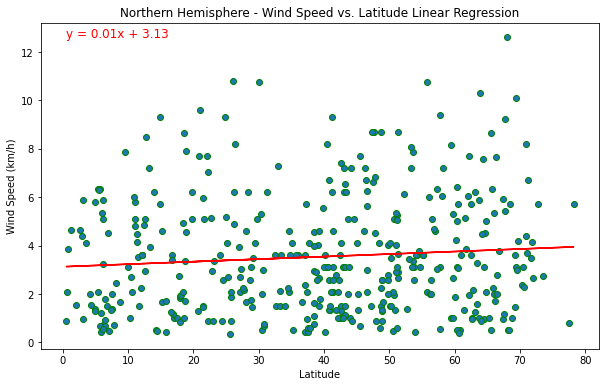

In [20]:
plt.figure(figsize=(10, 6))
linreg(northern_df["Lat"], northern_df["Wind Speed"])
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (km/h)")
plt.xlabel("Latitude")
plt.savefig("./output_data/output_images/NH_lat_vs_wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.06840435752462445


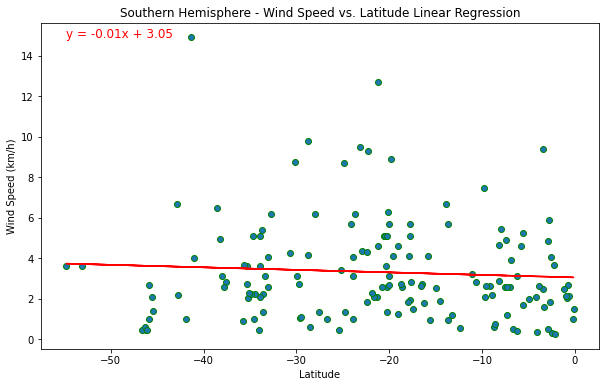

In [21]:
plt.figure(figsize=(10, 6))
linreg(southern_df["Lat"], southern_df["Wind Speed"])
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (km/h)")
plt.xlabel("Latitude")
plt.savefig("./output_data/output_images/NH_lat_vs_wind.png")